# Objective :-

* (The primary goal of this project is to build a predictive model that can accurately forecast customer behavior,
such as the likelihood of making a purchase, the products or services they are likely to be interested in,
and the factors that influence their decision-making process.
By identifying these insights, businesses can tailor their marketing strategies, personalize product recommendations,
optimize pricing strategies, and provide a seamless and engaging online shopping experience for their customers.)

# 1. Data Importing

In [7]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [8]:
import pandas as pd 
customers=pd.read_csv(r"C:\Users\prash\Downloads\online_shoppers_intention.csv")
customers.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


# 2. Data Preprocessing

### 2.1 Data-type and conversion

In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [10]:
customers.Revenue=customers.Revenue.replace({0:'No',1:'Yes'})

In [11]:
customers.Revenue=customers.Revenue.convert_dtypes()

In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [13]:
customers.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [14]:
customers.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## 2.1 Identifying & Treatment Of Missing value and Outliers

* Missing values

In [15]:
customers.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

* Outliers

In [16]:
customers.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

<AxesSubplot:>

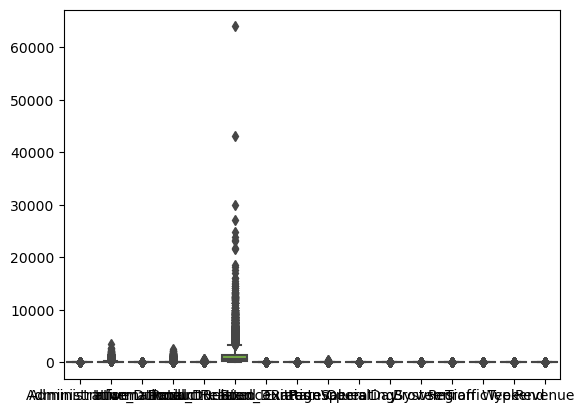

In [17]:
import seaborn as sns
sns.boxplot(data=customers)

### > Data have outliers in almost every feature in high quantity so insted of data manupulation, we should go with scaling

# 3. EDA

* Revenue Rate Analysis

In [18]:
import plotly.express as px

fig = px.pie(customers,names='Revenue',color='Revenue',
             color_discrete_map={'0':'red',
                                 '1':'green'})
fig.show()

* Countplot

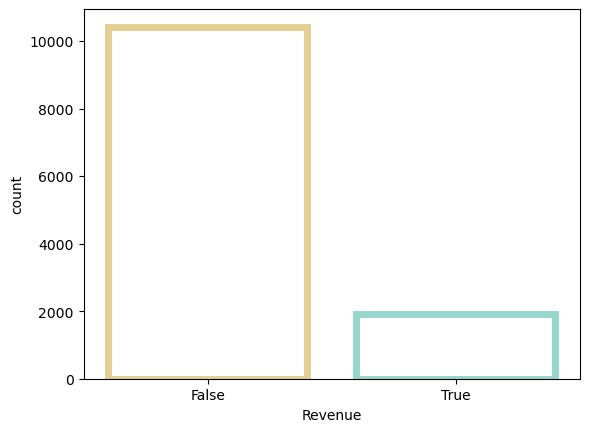

In [19]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x ='Revenue',data = customers,color="salmon", facecolor=(0, 0, 0, 0),
linewidth=5,
edgecolor=sns.color_palette("BrBG", 2))
# Show the plot
plt.show()

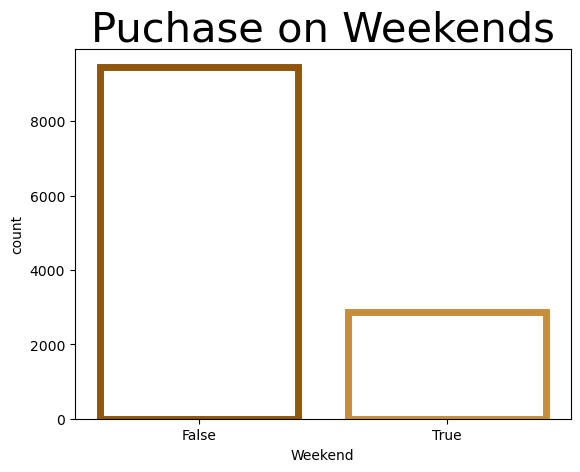

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x ='Weekend',data = customers,color="salmon", facecolor=(0, 0, 0, 0),
linewidth=5,
edgecolor=sns.color_palette("BrBG", 8))
# Show the plot
plt.title('Puchase on Weekends', fontsize = 30)
plt.show()

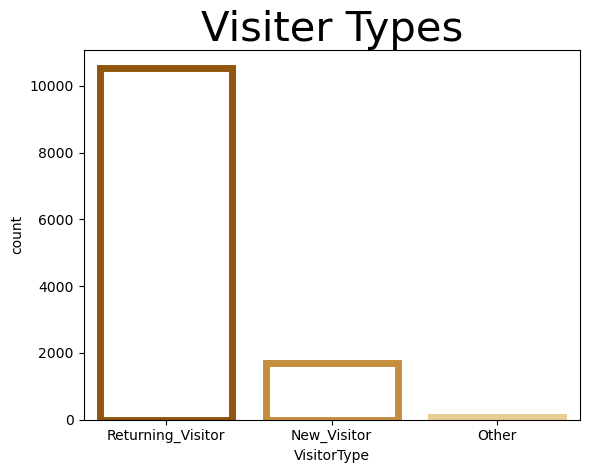

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x ='VisitorType',data = customers,color="salmon", facecolor=(0, 0, 0, 0),
linewidth=5,
edgecolor=sns.color_palette("BrBG", 8))
# Show the plot
plt.title('Visiter Types', fontsize = 30)
plt.show()

In [22]:
customers['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [23]:
customers['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [24]:
customers['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [25]:
customers['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

### * Correlation

<AxesSubplot:>

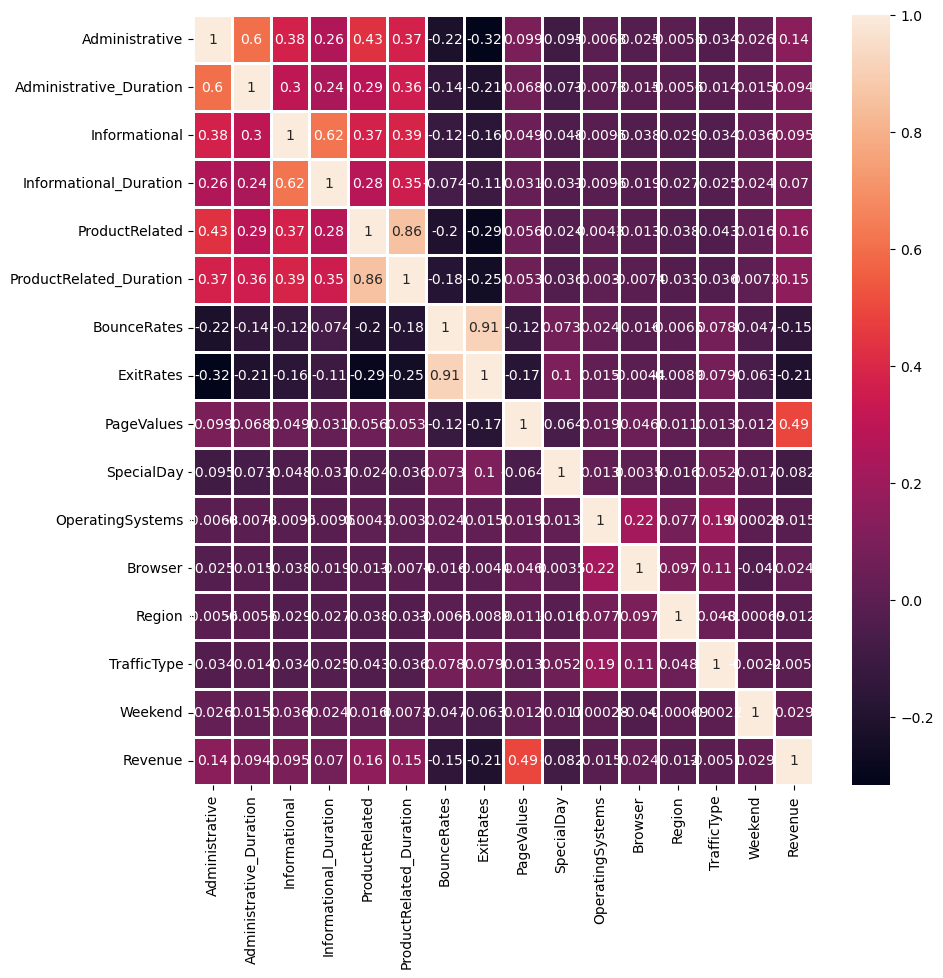

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(customers.corr(),annot = True,linewidth=1)

### > We can see there is 91% high colinearity present between Exit rate and Bounce rate

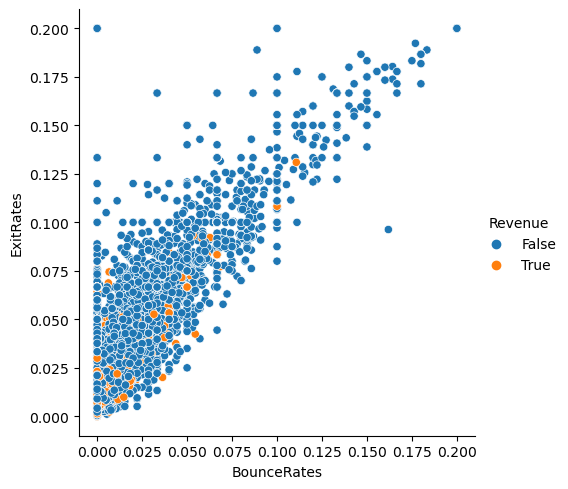

In [27]:
sns.relplot(data=customers, x="BounceRates", y="ExitRates",hue='Revenue')

#### * Reletion between visited customers and Revenue 

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

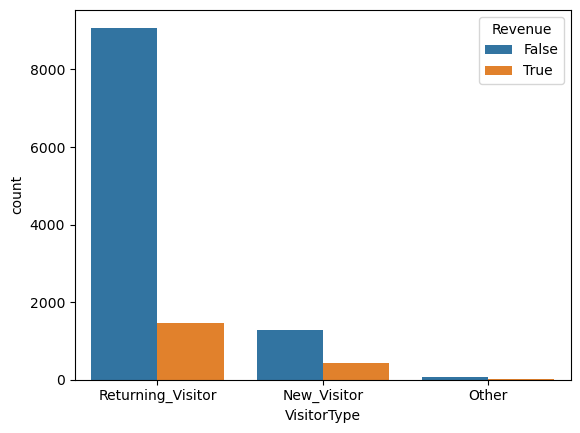

In [28]:
sns.countplot(data=customers, x="VisitorType", hue="Revenue")

<AxesSubplot:xlabel='OperatingSystems', ylabel='count'>

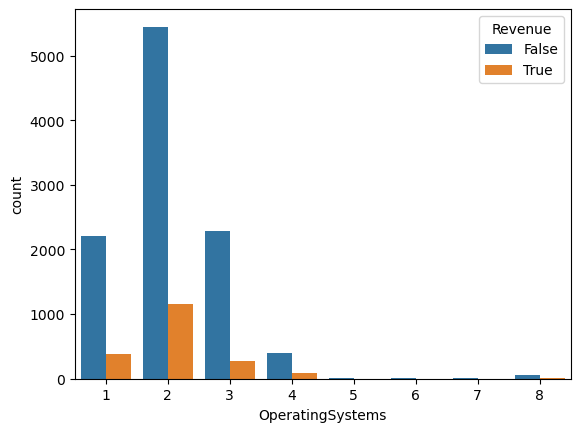

In [29]:
sns.countplot(data=customers, x="OperatingSystems", hue="Revenue")

<AxesSubplot:xlabel='Month', ylabel='VisitorType'>

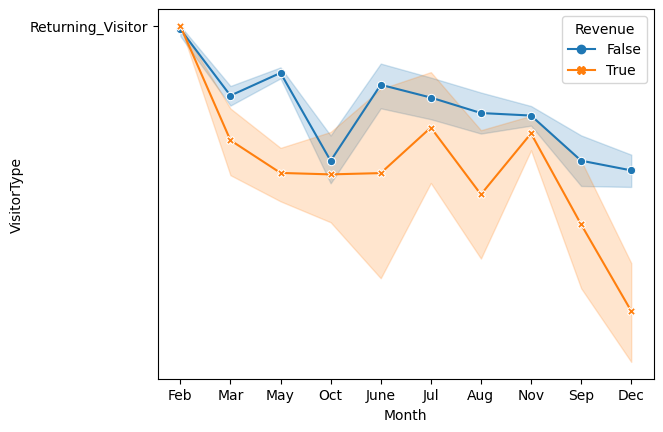

In [30]:
sns.lineplot(
    data=customers,
    x="Month", y="VisitorType", hue="Revenue", style="Revenue",
    markers=True, dashes=False
)

In [31]:
customers.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

# 4. Labeling the Data

In [32]:
# #Employee Numeric columns
customer_num = customers[customers.select_dtypes(include=[np.number]).columns.tolist()]
customer_num.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,4,1,9,3


In [33]:
customer_dummies = customers[customers.select_dtypes(include=['object','bool']).columns.tolist()]
customer_dummies.head(3)

,Month,VisitorType,Weekend,Revenue
0,Feb,Returning_Visitor,False,False
1,Feb,Returning_Visitor,False,False
2,Feb,Returning_Visitor,False,False


In [34]:
from sklearn.preprocessing import LabelEncoder
customer_dummies=customer_dummies.apply(LabelEncoder().fit_transform)
customer_dummies.head(3)
# label in ascending order

,Month,VisitorType,Weekend,Revenue
0,2,2,0,0
1,2,2,0,0
2,2,2,0,0


In [35]:
customer = pd.concat([customer_num, customer_dummies],axis=1)
customer.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,2,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,2,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,2,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,2,2,1,0


# 5. Data Partition

In [36]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
train_x = customer.drop(['Revenue'],axis=1)
train_y = customer['Revenue']

# Train test split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3,random_state=20)

# 6. Scaling Data

In [37]:
from sklearn.preprocessing import StandardScaler ,minmax_scale
scaler = StandardScaler()   # converting data into Z-scale = X-mean / Standard Deviation
#scaler.fit(X_train)         # Mean = 0 & standard Deviation =1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train[0:5]

array([[-0.39772834, -0.45468376,  1.95986735,  0.33103277,  1.93145376,
         0.89343321, -0.42045067, -0.76169747,  0.58988028, -0.30550811,
        -1.24704497, -0.20625652, -0.8882585 ,  1.76478311,  0.76568234,
         0.41362051, -0.55151649],
       [ 3.46836477,  6.34440901,  2.74499685,  6.78608611,  5.44606608,
         8.97598473, -0.09494898, -0.07991283, -0.01282973, -0.30550811,
        -0.1258736 , -0.20625652, -0.8882585 , -0.25481952, -0.919219  ,
         0.41362051, -0.55151649],
       [-0.39772834, -0.37671981, -0.39552115, -0.2421905 , -0.39697691,
        -0.11555466, -0.16063169, -0.29387855,  3.36579875, -0.30550811,
        -0.1258736 ,  1.5464839 ,  2.44502808, -0.75972018, -1.76166968,
         0.41362051, -0.55151649],
       [-0.69512012, -0.45468376, -0.39552115, -0.2421905 , -0.22124629,
        -0.38989365, -0.45382191, -0.70244224,  0.43187317, -0.30550811,
        -0.1258736 , -0.20625652,  2.44502808, -0.50726985,  1.18690768,
        -2.44806978

In [39]:
X_train.mean(axis=0)

array([-8.23244972e-19,  1.42009758e-17,  2.90193853e-17, -1.60532770e-17,
        4.67191522e-17, -1.17106597e-16, -1.31719196e-17, -5.10411883e-17,
       -6.99758227e-18, -2.75787066e-17,  4.93946983e-18, -9.87893967e-17,
       -1.01670754e-16,  7.98547623e-17,  1.74527934e-16,  1.28837838e-16,
       -7.98547623e-17])

# 7. Model Building

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model= RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=20)

# 8. Prediction on train dataset

In [41]:
X_train=pd.DataFrame(X_train,columns=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'])
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.397728,-0.454684,1.959867,0.331033,1.931454,0.893433,-0.420451,-0.761697,0.589880,-0.305508,-1.247045,-0.206257,-0.888259,1.764783,0.765682,0.413621,-0.551516
1,3.468365,6.344409,2.744997,6.786086,5.446066,8.975985,-0.094949,-0.079913,-0.012830,-0.305508,-0.125874,-0.206257,-0.888259,-0.254820,-0.919219,0.413621,-0.551516
2,-0.397728,-0.376720,-0.395521,-0.242191,-0.396977,-0.115555,-0.160632,-0.293879,3.365799,-0.305508,-0.125874,1.546484,2.445028,-0.759720,-1.761670,0.413621,-0.551516
3,-0.695120,-0.454684,-0.395521,-0.242191,-0.221246,-0.389894,-0.453822,-0.702442,0.431873,-0.305508,-0.125874,-0.206257,2.445028,-0.507270,1.186908,-2.448070,-0.551516
4,2.873581,0.916660,1.174738,0.152774,1.536060,1.617894,-0.294071,-0.473474,-0.317657,-0.305508,0.995298,-0.206257,-0.888259,1.512333,0.765682,0.413621,1.813182


In [42]:
y_train.reset_index(drop=True, inplace=True)

In [43]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.397728,-0.454684,1.959867,0.331033,1.931454,0.893433,-0.420451,-0.761697,0.589880,-0.305508,-1.247045,-0.206257,-0.888259,1.764783,0.765682,0.413621,-0.551516,1
1,3.468365,6.344409,2.744997,6.786086,5.446066,8.975985,-0.094949,-0.079913,-0.012830,-0.305508,-0.125874,-0.206257,-0.888259,-0.254820,-0.919219,0.413621,-0.551516,0
2,-0.397728,-0.376720,-0.395521,-0.242191,-0.396977,-0.115555,-0.160632,-0.293879,3.365799,-0.305508,-0.125874,1.546484,2.445028,-0.759720,-1.761670,0.413621,-0.551516,1
3,-0.695120,-0.454684,-0.395521,-0.242191,-0.221246,-0.389894,-0.453822,-0.702442,0.431873,-0.305508,-0.125874,-0.206257,2.445028,-0.507270,1.186908,-2.448070,-0.551516,1
4,2.873581,0.916660,1.174738,0.152774,1.536060,1.617894,-0.294071,-0.473474,-0.317657,-0.305508,0.995298,-0.206257,-0.888259,1.512333,0.765682,0.413621,1.813182,0


In [44]:
train['Predicted']=Model.predict(X_train)
train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Predicted
0,-0.397728,-0.454684,1.959867,0.331033,1.931454,0.893433,-0.420451,-0.761697,0.589880,-0.305508,-1.247045,-0.206257,-0.888259,1.764783,0.765682,0.413621,-0.551516,1,1
1,3.468365,6.344409,2.744997,6.786086,5.446066,8.975985,-0.094949,-0.079913,-0.012830,-0.305508,-0.125874,-0.206257,-0.888259,-0.254820,-0.919219,0.413621,-0.551516,0,0
2,-0.397728,-0.376720,-0.395521,-0.242191,-0.396977,-0.115555,-0.160632,-0.293879,3.365799,-0.305508,-0.125874,1.546484,2.445028,-0.759720,-1.761670,0.413621,-0.551516,1,1
3,-0.695120,-0.454684,-0.395521,-0.242191,-0.221246,-0.389894,-0.453822,-0.702442,0.431873,-0.305508,-0.125874,-0.206257,2.445028,-0.507270,1.186908,-2.448070,-0.551516,1,1
4,2.873581,0.916660,1.174738,0.152774,1.536060,1.617894,-0.294071,-0.473474,-0.317657,-0.305508,0.995298,-0.206257,-0.888259,1.512333,0.765682,0.413621,1.813182,0,0


# 9. Model Performance matrix

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Revenue'], train['Predicted'])
print(confusion_matrix)

[[7163  113]
 [ 771  584]]


In [46]:
from sklearn.metrics import classification_report
print(classification_report(train['Revenue'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7276
           1       0.84      0.43      0.57      1355

    accuracy                           0.90      8631
   macro avg       0.87      0.71      0.76      8631
weighted avg       0.89      0.90      0.88      8631



# 10. Prediction on Test Dataset

In [47]:
X_test=pd.DataFrame(X_test,columns=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'])
X_test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.197055,0.004932,0.389608,-0.242191,-0.287145,-0.284522,0.012617,-0.214681,0.302693,-0.305508,-1.247045,-0.790503,-0.054937,-0.507270,0.765682,0.413621,-0.551516
1,-0.397728,0.102202,-0.395521,-0.242191,-0.506809,-0.508076,-0.453822,-0.367292,-0.317657,-0.305508,0.995298,-0.206257,2.028367,-0.507270,-1.761670,0.413621,1.813182
2,-0.100337,-0.283442,-0.395521,-0.242191,2.590444,1.880507,-0.204971,-0.489212,-0.317657,-0.305508,0.995298,-0.206257,2.028367,2.269684,0.765682,0.413621,-0.551516
3,-0.695120,-0.454684,-0.395521,-0.242191,-0.638607,-0.597578,-0.453822,0.489202,-0.317657,-0.305508,2.116469,-0.206257,1.195046,-0.759720,-0.076768,0.413621,-0.551516
4,-0.397728,-0.123337,-0.395521,-0.242191,-0.265179,-0.296444,-0.453822,-0.360440,-0.317657,-0.305508,-0.125874,-0.206257,2.445028,-0.254820,-1.761670,0.413621,-0.551516


In [48]:
y_test.reset_index(drop=True, inplace=True)

In [49]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.197055,0.004932,0.389608,-0.242191,-0.287145,-0.284522,0.012617,-0.214681,0.302693,-0.305508,-1.247045,-0.790503,-0.054937,-0.507270,0.765682,0.413621,-0.551516,0
1,-0.397728,0.102202,-0.395521,-0.242191,-0.506809,-0.508076,-0.453822,-0.367292,-0.317657,-0.305508,0.995298,-0.206257,2.028367,-0.507270,-1.761670,0.413621,1.813182,0
2,-0.100337,-0.283442,-0.395521,-0.242191,2.590444,1.880507,-0.204971,-0.489212,-0.317657,-0.305508,0.995298,-0.206257,2.028367,2.269684,0.765682,0.413621,-0.551516,0
3,-0.695120,-0.454684,-0.395521,-0.242191,-0.638607,-0.597578,-0.453822,0.489202,-0.317657,-0.305508,2.116469,-0.206257,1.195046,-0.759720,-0.076768,0.413621,-0.551516,0
4,-0.397728,-0.123337,-0.395521,-0.242191,-0.265179,-0.296444,-0.453822,-0.360440,-0.317657,-0.305508,-0.125874,-0.206257,2.445028,-0.254820,-1.761670,0.413621,-0.551516,0


In [50]:
test['Predicted']=Model.predict(X_test)
test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Predicted
0,0.197055,0.004932,0.389608,-0.242191,-0.287145,-0.284522,0.012617,-0.214681,0.302693,-0.305508,-1.247045,-0.790503,-0.054937,-0.507270,0.765682,0.413621,-0.551516,0,0
1,-0.397728,0.102202,-0.395521,-0.242191,-0.506809,-0.508076,-0.453822,-0.367292,-0.317657,-0.305508,0.995298,-0.206257,2.028367,-0.507270,-1.761670,0.413621,1.813182,0,0
2,-0.100337,-0.283442,-0.395521,-0.242191,2.590444,1.880507,-0.204971,-0.489212,-0.317657,-0.305508,0.995298,-0.206257,2.028367,2.269684,0.765682,0.413621,-0.551516,0,0
3,-0.695120,-0.454684,-0.395521,-0.242191,-0.638607,-0.597578,-0.453822,0.489202,-0.317657,-0.305508,2.116469,-0.206257,1.195046,-0.759720,-0.076768,0.413621,-0.551516,0,0
4,-0.397728,-0.123337,-0.395521,-0.242191,-0.265179,-0.296444,-0.453822,-0.360440,-0.317657,-0.305508,-0.125874,-0.206257,2.445028,-0.254820,-1.761670,0.413621,-0.551516,0,0


# 11. Model Performance Metrics on Test data

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Revenue'],test['Predicted'])
print(confusion_matrix)

[[3092   54]
 [ 326  227]]


In [52]:
from sklearn.metrics import classification_report
print(classification_report(test['Revenue'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3146
           1       0.81      0.41      0.54       553

    accuracy                           0.90      3699
   macro avg       0.86      0.70      0.74      3699
weighted avg       0.89      0.90      0.88      3699



# 12. Important Features

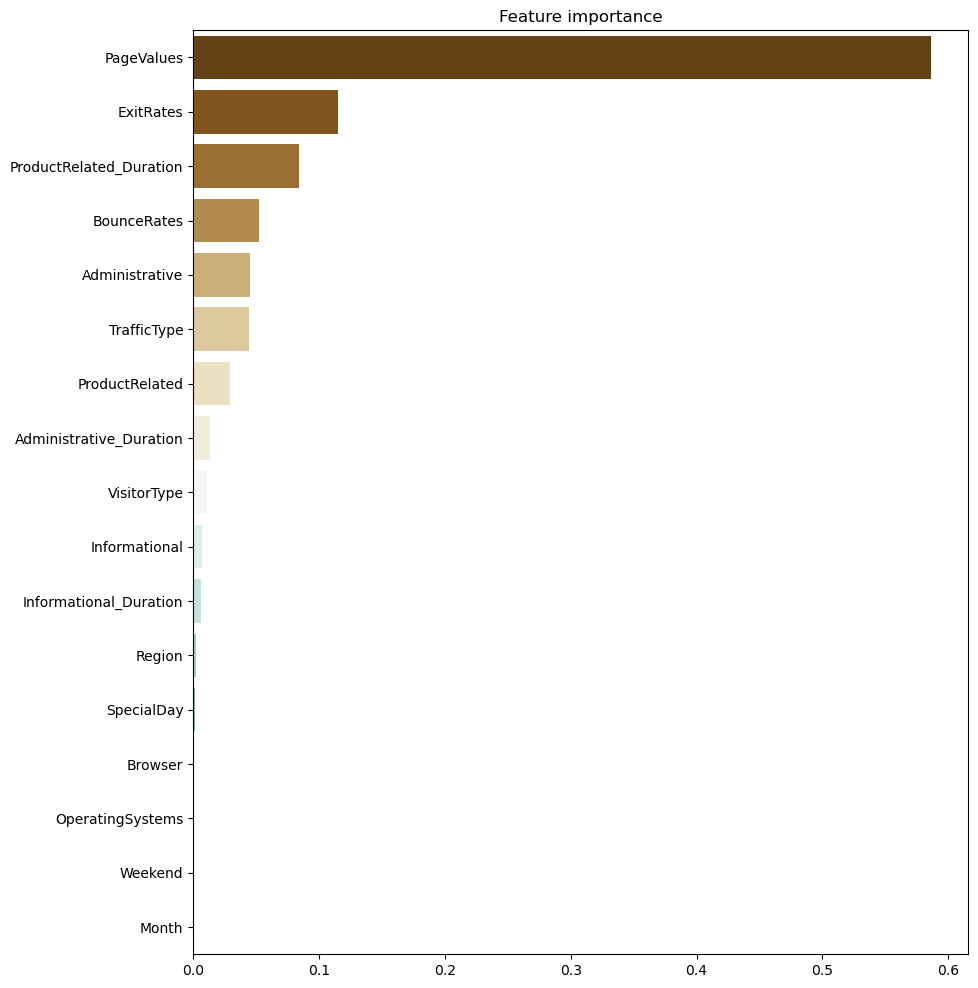

In [56]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=Model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

# 13. Random Forest Visualization

In [57]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [58]:
list(train_x.columns)

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Month',
 'VisitorType',
 'Weekend']

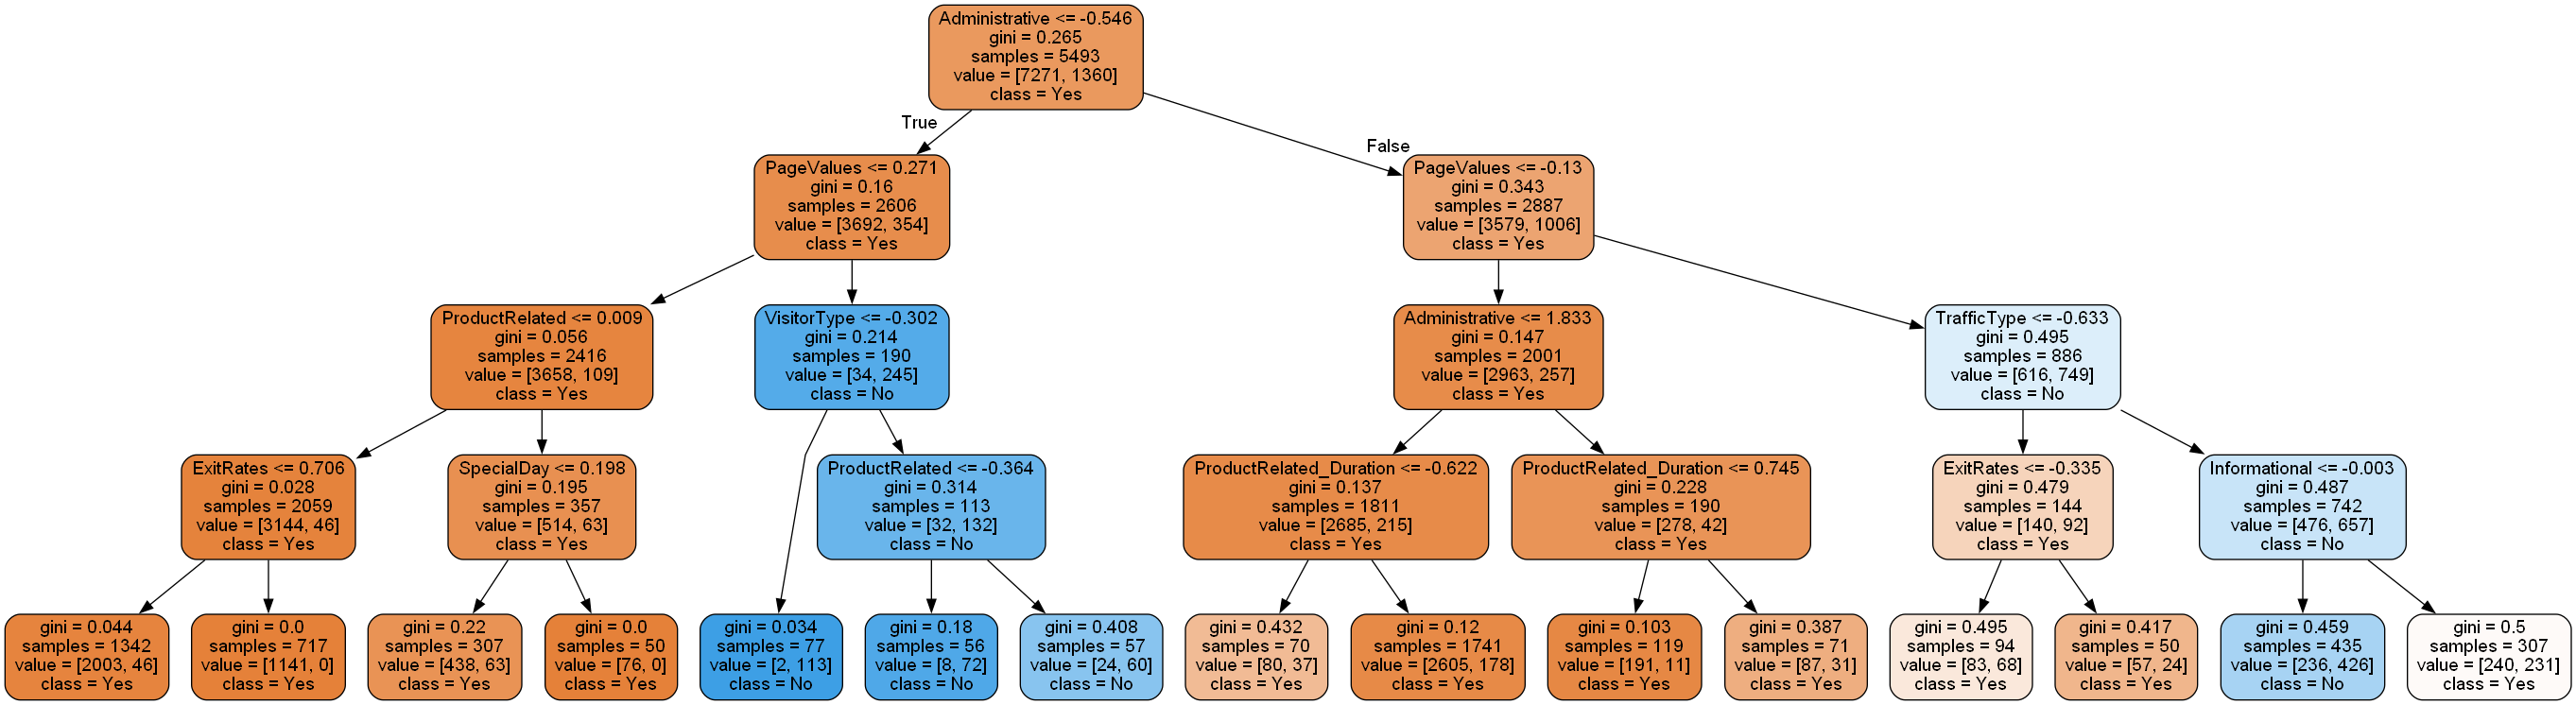

In [59]:
tree = Model.estimators_[10]  # specify the tree number   
Churn=['Yes','No'] 
feature_list = list(train_x.columns)  # all independent variable name

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=Churn,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

## Model II :- Gradient Boosting

In [60]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [2,4,5], # number of tress
                    'max_depth':    [2, 3],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'min_samples_leaf':[100,200,270], ## child
                    'min_samples_split':[50,70,80]} #parent 

In [61]:
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# Gridsearch the parameters to find the best parameters.
GBmodel= GradientBoostingClassifier(random_state=10,loss="deviance",criterion="mse")
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=GBmodel, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=5,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [2, 3],
                         'min_samples_leaf': [100, 200, 270],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [2, 4, 5]},
             scoring='accuracy', verbose=1)

In [62]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.8, 'max_depth': 3, 'min_samples_leaf': 270, 'min_samples_split': 50, 'n_estimators': 5}


In [63]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, min_samples_leaf=270,
                           min_samples_split=50, n_estimators=5)

In [64]:
# Prediction
train_pred = final_mod_GBM.predict(X_train)
test_pred = final_mod_GBM.predict(X_test)

## Confusion matrix - Train Dataset

In [65]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7276
           1       0.76      0.60      0.67      1355

    accuracy                           0.91      8631
   macro avg       0.84      0.78      0.81      8631
weighted avg       0.90      0.91      0.90      8631



## Confusion Matrix - Test Data

In [66]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      3146
           1       0.73      0.57      0.64       553

    accuracy                           0.90      3699
   macro avg       0.83      0.77      0.79      3699
weighted avg       0.90      0.90      0.90      3699



# Gradient Boosting Tree

In [ ]:
from sklearn.tree import export_graphviz
sub_tree = final_mod_GBM.estimators_[0, 0] #0 to 99  # Model ( Final_mod_GBM) = Give Tree
churn=['Yes','No']
feature_list = list(train_x.columns)

# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(sub_tree,
    out_file=None,
    class_names=churn,
    feature_names = feature_list, 
    filled=True, 
    rounded=True,
    special_characters=True,
    impurity=False)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())